<a href="https://colab.research.google.com/github/kaizeonwong/Algorithm_Interview_Notes-Chinese/blob/master/Intuition_into_Gaussian_likelihoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laws of probability
Sum rule
$$
p\big(X=x\big) = \sum_y p\big(X=x, Y=y\big) = \int p\big(X=x, Y\big) d Y
$$
Product rule
$$
	p\big(X=x, Y=y\big) = p\big(X=x | Y=y\big) p\big(Y=y\big)
$$
Bayes rule
$$
	p\big(X=x | Y=y, H\big) =\frac{p\big(Y=y | X=x, H\big) p\big(X=x | H\big)}{p\big(Y=y | H\big)}
$$

# Properties of Gaussian distributions:
If $x_1, x_2$ follow a joint Gaussian distribution:
$$
\begin{bmatrix} 
x_1 \\
x_2
\end{bmatrix}
\sim 
\mathcal{N} \bigg(
\begin{bmatrix} 
\mu_1, \\
\mu_2
\end{bmatrix}
, 
\begin{bmatrix} 
\Sigma_{11} & \Sigma_{12} \\
\Sigma_{12}^T & \Sigma_{22} 
\end{bmatrix}
\bigg),$$

then each marginal is Gaussian:
$$
x_1 \sim \mathcal{N}(\mu_1, \Sigma_{11}),
$$
each conditional is Gaussian:
$$
x_1 | x_2 \sim \mathcal{N}\big(
\mu_1 +\Sigma_{12} \Sigma_{22}^{-1}(x_2-\mu_2) , 
\Sigma_{11} - \Sigma_{12} \Sigma_{22} \Sigma_{21}^T
\big),$$
any linear combination is Gaussian:
$$
A x_1 + B x_2 + C \sim \mathcal{N}(A \mu_1 + B  \mu_2 + C, A \Sigma_{11} A^T + B \Sigma_{22} B^T)
$$
and the product of the marginal densities is an (unnormalised) Gaussian:
$$
\mathcal{N}(x; \mu_1, \Sigma_{11}) 
\mathcal{N}(x; \mu_2, \Sigma_{22})
=
C \cdot
\mathcal{N} \bigg(x;
(\Sigma_{11}^{-1}  + \Sigma_{22}^{-1})^{-1}
(
\Sigma_{11}^{-1} \mu_1
+ \Sigma_{22}^{-1} \mu_2
), 
(\Sigma_{11}^{-1}  + \Sigma_{22}^{-1})^{-1}
\bigg)
$$
with $C = \mathcal{N}(\mu_1; \mu_2, \Sigma_{11} + \Sigma_{22})$.

More [here](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf#page=40).
# Visualising Gaussian likelihoods:

In [0]:
import pylab
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
eps = 0.01

In [0]:
def plot_g(mu, sigma, args={}):
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x, loc=mu, scale=sigma**2.)
    return pylab.plot(x,y, linewidth=2., label='m='+str(mu)+', s='+str(sigma), **args)

def plot_v(x0, y0, c):
    x = [x0 - eps, x0 + eps]
    y = [0, y0]
    return pylab.step(x, y, linewidth=5., c=c, label='pdf='+str(y0))

In [0]:
def plot_2d_in_3d(f, sigma, args={'linewidth': 2.}):
    x = np.linspace(-5, 5, 1000)
    y = f(x)
    return ax.plot(x, y, zs=sigma, zdir='y', **args)
    
def plot_1d_in_3d(sigma, f, t, zdir='y', args={'linewidth': 2.}):
    x = np.linspace(f, t, 1000)
    y = 0 * x
    return ax.plot(x, y, zs=sigma, zdir=zdir, **args)
    
def plot_v_in_3d(x0, y0, z0, c):
    return plot_2d_in_3d(lambda x: z0 * (x0 - eps < x) * (x < x0 + eps), y0, {'linewidth': 5., 'c': c})

def plot_3d_g(mu, sigma, sigma0):
    return plot_2d_in_3d(lambda x: norm.pdf(x, loc=mu, scale=sigma**2.), sigma=sigma0)

def plot_sigma_constant(sigma0):
    return plot_1d_in_3d(sigma0, -5, 5, zdir='y')

def plot_mu_constant(mu0):
    return plot_1d_in_3d(mu0, 0, 2, zdir='x')

# I chose $\mu$ and $\sigma$ and generated some data
$$
x_n \sim \mathcal{N}(x_n; \mu, \sigma^2)
$$

# I give you one point $\{x_1\}$:

Text(0.5, 1.0, 'Data space')

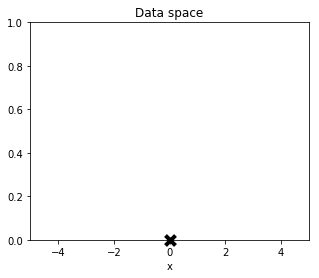

In [0]:
pylab.figure(figsize=(5,4))
pylab.xlabel('x')
pylab.ylabel('')
pylab.xlim(-5, 5)
pylab.ylim(0, 1)
D = np.array([0.0])
pylab.scatter(D, [0 for x in D], s=100, linewidth=4, c='k', marker='x', clip_on=False)
pylab.title("Data space")

# Let's look at some possible hypotheses for my $\mu$ and $\sigma$

Text(0.5, 1.0, 'Data space')

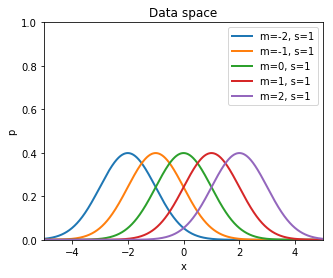

In [0]:
pylab.figure(figsize=(5,4))
pylab.xlabel('x')
pylab.ylabel('p')
pylab.xlim(-5, 5)
pylab.ylim(0, 1)
mu_m = [-2, -1, 0, 1, 2]
s_m = [1, 1, 1, 1, 1]
pm = []
for m, s in zip(mu_m, s_m):
    pm += plot_g(mu=m, sigma=s)
pylab.legend()
pylab.title("Data space")

## and in hypothesis space:

Text(0.5, 1.0, 'Hypothesis space')

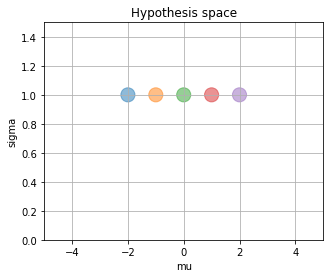

In [0]:
pylab.figure(figsize=(5,4))
pylab.xlabel('mu')
pylab.ylabel('sigma')
pylab.xlim(-5, 5)
pylab.ylim(0, 1.5)
pylab.grid(True)
pylab.scatter(mu_m, s_m, s=200, alpha=0.5, c=[g.get_color() for g in pm])
pylab.title("Hypothesis space")

## some more hypotheses:

Text(0.5, 1.0, 'Data space (some more hypotheses)')

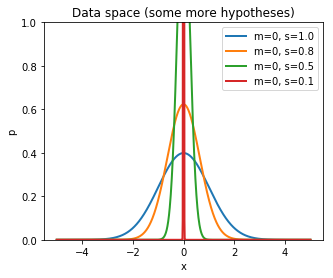

In [0]:
pylab.figure(figsize=(5,4))
pylab.xlabel('x')
pylab.ylabel('p')
pylab.ylim(0, 1)
mu_s = [0, 0, 0, 0]
s_s = list(reversed([0.1, 0.5, 0.8, 1.]))
ps = []
for m, s in zip(mu_s, s_s):
    ps += plot_g(mu=m, sigma=s)
pylab.legend()
pylab.title("Data space (some more hypotheses)")

## and in hypothesis space:

Text(0.5, 1.0, 'Hypothesis space (some more hypotheses)')

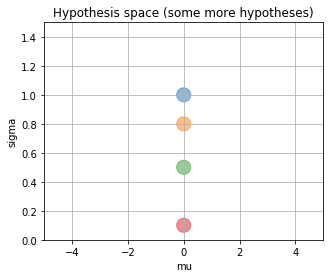

In [0]:
pylab.figure(figsize=(5,4))
pylab.xlabel('mu')
pylab.ylabel('sigma')
pylab.xlim(-5, 5)
pylab.ylim(0, 1.5)
pylab.grid(True)
pylab.scatter(mu_s, s_s, s=200, alpha=0.5, c=[g.get_color() for g in ps])
pylab.title("Hypothesis space (some more hypotheses)")

# Likelihood for our single data point

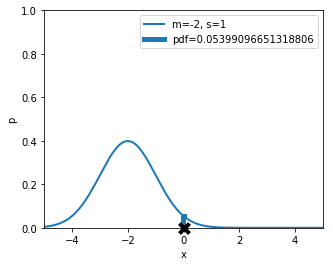

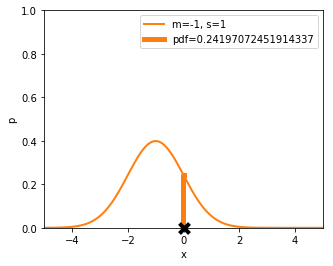

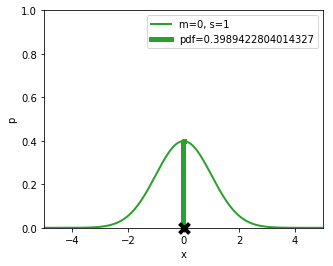

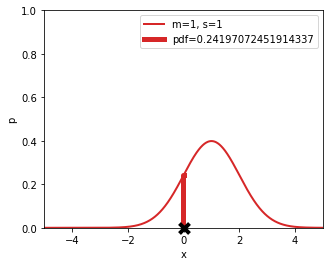

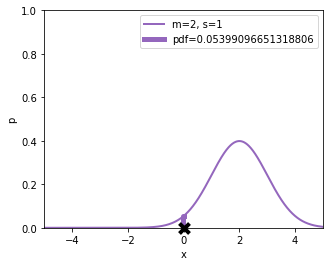

In [0]:
D0 = [D[0]]
for m, s, p in zip(mu_m, s_m, pm):
    pylab.figure(figsize=(5,4))
    pylab.xlabel('x')
    pylab.ylabel('p')
    pylab.xlim(-5, 5)
    pylab.ylim(0, 1)
    plot_g(mu=m, sigma=s, args={'c': p.get_color()})
    for x in D0:
        mu, sigma = m, s
        pdf = norm.pdf(x, loc=mu, scale=sigma**2.)
        plot_v(x, pdf, c=p.get_color())
    pylab.legend()
    pylab.scatter(D0, [0 for x in D0], s=100, linewidth=4, c='k', marker='x', clip_on=False, zorder=10)

# Compare all likelihoods for a single point in hypothesis space

Text(5, 1, 's=1')

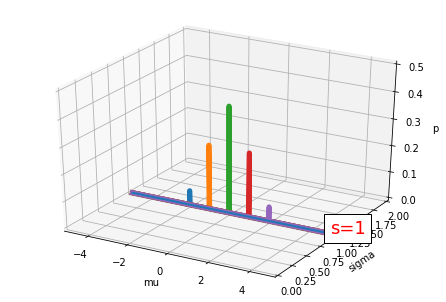

In [0]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.invert_yaxis()
ax.set_xlabel("mu")
ax.set_ylabel("sigma")
ax.set_zlabel("p")
ax.set_xlim(-5, 5)
ax.set_ylim(0, 2)
ax.set_zlim(0, 0.5)
for x in D0:
    for m, s, p in zip(mu_m, s_m, pm):
        pdf = norm.pdf(x, loc=m, scale=s**2.)
        plot_v_in_3d(m, s, pdf, c=p.get_color())
plot_sigma_constant(s)
ax.text(5, s, 0, 's='+str(s), color='r', fontsize=18, 
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1., 1.),
                   ))

## ... and for a smaller $\sigma$

Text(5, 0.85, 's=0.85')

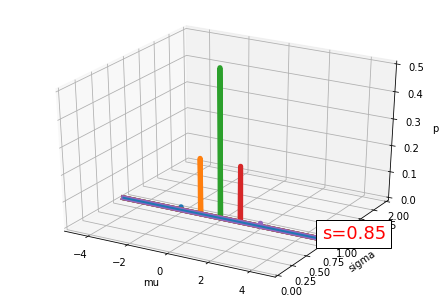

In [0]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.invert_yaxis()
ax.set_xlabel("mu")
ax.set_ylabel("sigma")
ax.set_zlabel("p")
ax.set_xlim(-5, 5)
ax.set_ylim(0, 2)
ax.set_zlim(0, 0.5)
s = 0.85
for x in D0:
    for m, p in zip(mu_m, pm):
        pdf = norm.pdf(x, loc=m, scale=s**2.)
        plot_v_in_3d(m, s, pdf, c=p.get_color())
plot_sigma_constant(s)
ax.text(5, s, 0, 's='+str(s), color='r', fontsize=18, 
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1., 1.),
                   ))

## ... and an even smaller $\sigma$

Text(5, 0.65, 's=0.65')

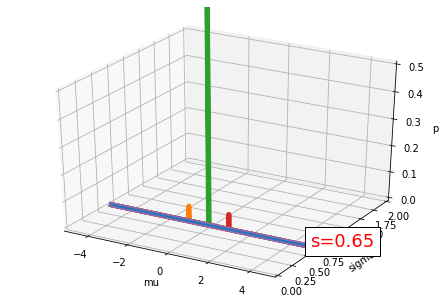

In [0]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.invert_yaxis()
ax.set_xlabel("mu")
ax.set_ylabel("sigma")
ax.set_zlabel("p")
ax.set_xlim(-5, 5)
ax.set_ylim(0, 2)
ax.set_zlim(0, 0.5)
s = 0.65
for x in D0:
    for m, p in zip(mu_m, pm):
        pdf = norm.pdf(x, loc=m, scale=s**2.)
        plot_v_in_3d(m, s, pdf, c=p.get_color())
plot_sigma_constant(s)
ax.text(5, s, 0, 's='+str(s), color='r', fontsize=18, 
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1., 1.),
                   ))

# Compare some more hypotheses

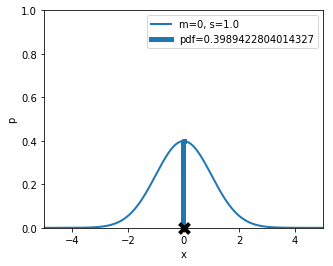

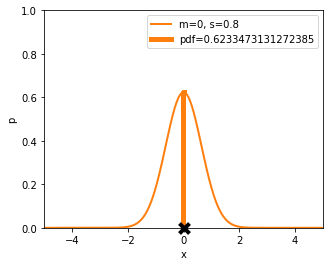

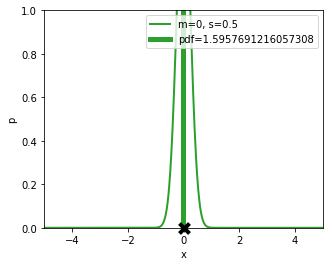

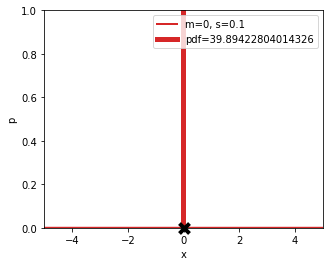

In [0]:
for m, s, p in zip(mu_s, s_s, ps):
    pylab.figure(figsize=(5,4))
    pylab.xlabel('x')
    pylab.ylabel('p')
    pylab.xlim(-5, 5)
    pylab.ylim(0, 1)
    plot_g(mu=m, sigma=s, args={'c': p.get_color()})
    for x in D0:
        mu, sigma = m, s
        pdf = norm.pdf(x, loc=mu, scale=sigma**2.)
        plot_v(x, pdf, c=p.get_color())
    pylab.legend()
    pylab.scatter(D0, [0 for x in D0], s=100, linewidth=4, c='k', marker='x', clip_on=False, zorder=10)

## and in hypothesis space:

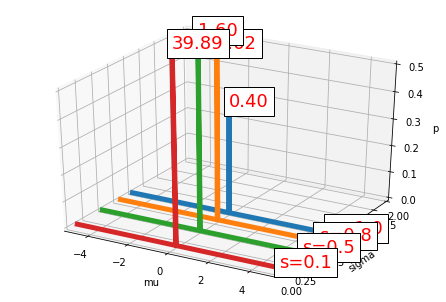

In [0]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.invert_yaxis()
ax.set_xlabel("mu")
ax.set_ylabel("sigma")
ax.set_zlabel("p")
ax.set_xlim(-5, 5)
ax.set_ylim(0, 2)
ax.set_zlim(0, 0.5)
for x in D0:
    for m, s, p in zip(mu_s, s_s, ps):
        pdf = norm.pdf(x, loc=m, scale=s**2.)
        pdf_t = "{:.2f}".format(pdf)
        pdf = np.clip(pdf, 0, 0.7)
        plot_v_in_3d(m, s, pdf, c=p.get_color())
        ax.text(m, s, pdf, pdf_t, color='r', fontsize=18, 
                 bbox=dict(boxstyle="square",
                           ec=(0., 0., 0.),
                           fc=(1., 1., 1.),
                           ))
        ax.text(5, s, 0, 's='+str(s), color='r', fontsize=18, 
                 bbox=dict(boxstyle="square",
                           ec=(0., 0., 0.),
                           fc=(1., 1., 1.),
                           ))

# I give you some more data...

Text(0.5, 1.0, 'Data space')

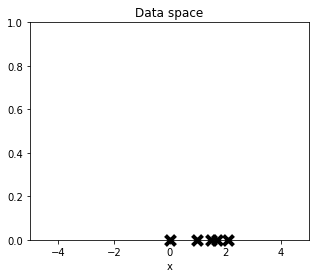

In [0]:
pylab.figure(figsize=(5,4))
pylab.xlabel('x')
pylab.ylabel('')
pylab.xlim(-5, 5)
pylab.ylim(0, 1)
D = np.array([0.6, 1.6, 2.1, 2.3, 2.7]) - 0.6
pylab.scatter(D, [0 for x in D], s=100, linewidth=4, c='k', marker='x', clip_on=False)
pylab.title("Data space")

# Put the data and some hypotheses in the same plot

Text(0.5, 1.0, 'Data space')

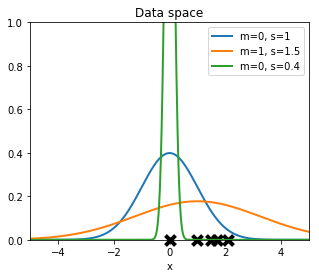

In [0]:
pylab.figure(figsize=(5,4))
pylab.xlabel('x')
pylab.ylabel('')
pylab.xlim(-5, 5)
pylab.ylim(0, 1)
D = np.array([0.6, 1.6, 2.1, 2.3, 2.7]) - 0.6
pylab.scatter(D, [0 for x in D], s=100, linewidth=4, c='k', marker='x', clip_on=False)
plot_g(mu=0, sigma=1)
plot_g(mu=1, sigma=1.5)
plot_g(mu=0, sigma=0.4)
pylab.legend()
pylab.title("Data space")

# Likelihood for all data points

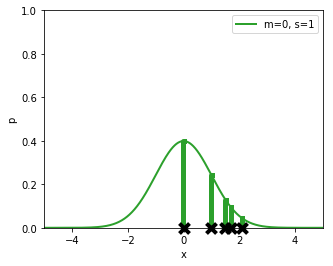

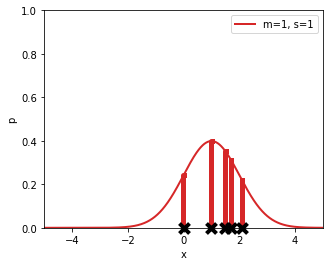

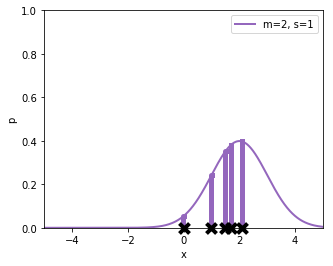

In [0]:
for m, s, p in zip(mu_m[2:], s_m[2:], pm[2:]):
    pylab.figure(figsize=(5,4))
    pylab.xlabel('x')
    pylab.ylabel('p')
    pylab.xlim(-5, 5)
    pylab.ylim(0, 1)
    plot_g(mu=m, sigma=s, args={'c': p.get_color()})
    pylab.legend()
    for x in D:
        mu, sigma = m, s
        pdf = norm.pdf(x, loc=mu, scale=sigma**2.)
        plot_v(x, pdf, c=p.get_color())
    pylab.scatter(D, [0 for x in D], s=100, linewidth=4, c='k', marker='x', clip_on=False, zorder=10)

Text(5, 1, 's=1')

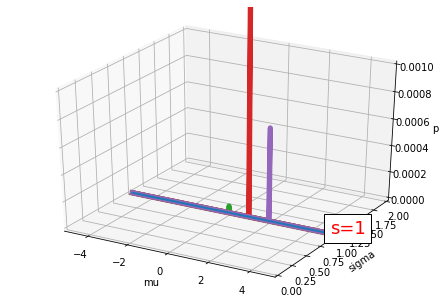

In [0]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.invert_yaxis()
ax.set_xlabel("mu")
ax.set_ylabel("sigma")
ax.set_zlabel("p")
ax.set_xlim(-5, 5)
ax.set_ylim(0, 2)
ax.set_zlim(0, 0.001)
for m, s, p in zip(mu_m, s_m, pm):
    pdf = 1.
    for x in D:
        pdf *= norm.pdf(x, loc=m, scale=s**2.)
    plot_v_in_3d(m, s, pdf, c=p.get_color())
plot_sigma_constant(s)
ax.text(5, s, 0, 's='+str(s), color='r', fontsize=18, 
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1., 1.),
                   ))

## and some more hypotheses

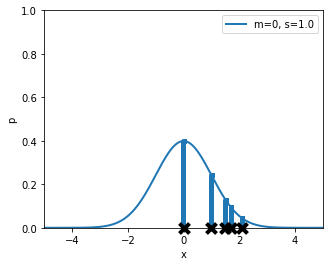

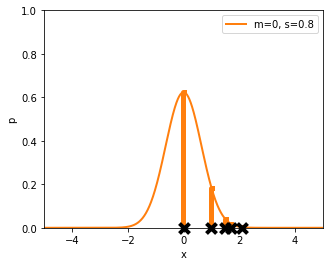

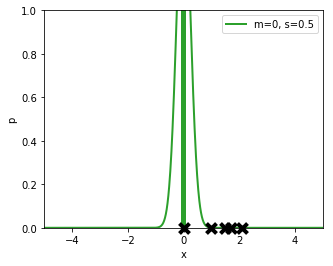

In [0]:
for m, s, p in zip(mu_s[:3], s_s[:3], ps[:3]):
    pylab.figure(figsize=(5,4))
    pylab.xlabel('x')
    pylab.ylabel('p')
    pylab.xlim(-5, 5)
    pylab.ylim(0, 1)
    plot_g(mu=m, sigma=s, args={'c': p.get_color()})
    pylab.legend()
    for x in D:
        mu, sigma = m, s
        pdf = norm.pdf(x, loc=mu, scale=sigma**2.)
        plot_v(x, pdf, c=p.get_color())
    pylab.scatter(D, [0 for x in D], s=100, linewidth=4, c='k', marker='x', clip_on=False, zorder=10)

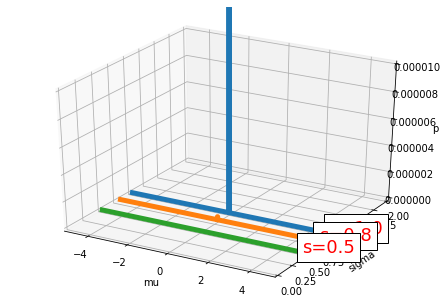

In [0]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.invert_yaxis()
ax.set_xlabel("mu")
ax.set_ylabel("sigma")
ax.set_zlabel("p")
ax.set_xlim(-5, 5)
ax.set_ylim(0, 2)
ax.set_zlim(0, 0.00001)
for m, s, p in zip(mu_s[:3], s_s[:3], ps[:3]):
    pdf = 1.
    for x in D:
        pdf *= norm.pdf(x, loc=m, scale=s**2.)
    pdf_t = "{:.6f}".format(pdf)
    pdf = np.clip(pdf, 0, 0.7)
    plot_v_in_3d(m, s, pdf, c=p.get_color())
    ax.text(5, s, 0, 's='+str(s), color='r', fontsize=18, 
             bbox=dict(boxstyle="square",
                       ec=(0., 0., 0.),
                       fc=(1., 1., 1.),
                       ))